In [6]:
import math
import matplotlib.pyplot as plt

precision = 12  # sets the number of decimal places in the cut positions

def integral_of_circle(f: float) -> float:
    """
    calculates the integral of 'double_semi_circle' from -1 to 'f'
    :param f: a float representing the positive bound of the integral.
    :return: the area in a circle x^2 + y^2 = 1 between x = -1 and x = f (where ^ is an exponent, not XOR)
    """
    return ((f * (1 - f ** 2) ** 0.5) + math.asin(f)) + math.pi / 2


def double_semi_circle(p: float) -> float:
    """
    function equal to 'f(x) = 2(sqrt(1-x^2))' (where ^ is an exponent, not XOR)
    this is also the derivative of 'integral_of_circle'
    :param p: float, the input of the function (x)
    :return: the value of the above equation at x = p
    """
    return 2 * (math.sqrt(1 - (p ** 2)))


def optimized_get_distances_abs(num_sections: int, radius_factor: float) -> list:
    """
    returns a list of x values for parallel cuts that split a circle 'c' into 'n' regions of equal area
    :param num_sections: the number of regions 'n' that the circle 'c' should be split into
    :param radius_factor: the radius of the circle 'c'
    """
    cuts = []  # clear list of cuts
    target = math.pi / num_sections  # the target area of each region.
    for i in range(1, int((num_sections + 1) / 2)):  # for the first half of cuts
        answer = numerical_solve(
            integral_of_circle,
            # function that returns the area under a circle from x = -1 to x = f, where f is the function argument
            (target * i),  # the target area between x = -1 and the position of cut i
            double_semi_circle,  # the derivative of the 'integral_of_circle' function
            0,  # a reasonable guess for the position of the cut i. It must be between -1 and 1 inclusive
            10)  # the maximum number of iterations

        # because 'answer' is for a circle of radius 1, multiply it by the radius factor to get the real cut position.
        temp_answer = round(answer * radius_factor, precision)
        cuts.append(temp_answer)  # add it to the list
    num_cuts = len(cuts)
    if num_sections % 2 == 0:
        cuts.append(0.0)  # if the number of sections is even, there must be a cut in the middle
    for j in range(num_cuts - 1, -1, -1):
        cuts.append(-cuts[j])  # mirror the list of cuts
    return cuts


def numerical_solve(expression_function,
                    target: float,
                    ddx_expression_function,
                    initial_guess: float,
                    iterations: int) -> float:
    """
    :param expression_function: the function who's input to optimize towards the value of target
    :param target: the target value of expression function
    :param ddx_expression_function: the derivative of expression_function
    :param initial_guess: a starting guess between -1 and 1
    :param iterations: the number of iterations to execute
    :return: the value that passed into 'expression_function' yields target.
    """
    current_guess = initial_guess
    for iteration_num in range(iterations):  # repeat for the number of iterations

        delta_y = target - expression_function(current_guess)
        # measure the difference between f(guess) and the target value

        if math.fabs(delta_y) < (0.1 ** precision):
            # if the answers are the same up to 'precision' decimal places,
            return current_guess  # then stop iterating because no more precision is needed

        guess_delta_x = delta_y / ddx_expression_function(current_guess)
        # if the derivative shows change in y over change in x, then evaluate those values at the guess,
        # and because we know the change in y between our target and the value of f(guess),
        # solve for change in x between guess and the answer.
        # This is not perfect because it assumes the slope is locally linear, which it isn't.
        # so more than one iteration is needed

        current_guess += guess_delta_x  # adjust the guess according to the predicted offset

    print(f"was not able to calculate in less than {iterations} iterations, precision diminished")
    # never happens. too strong
    return current_guess  # return the latest guess after all iterations have been executed


def visualizer(cut_list: list, display_radius: float):
    """
    saves a matplotlib graph with a visualization of the answer
    Not relevant to finding the actual answer, just displays it.
    :param cut_list: the list of x values for the cuts to place.
    :param display_radius: the radius of the circle
    :return: nothing
    """
    color_list = ["red", "blue", "green"]

    figure, axes = plt.subplots()
    axes.set_aspect(1)

    circle = plt.Circle((0, 0), display_radius, fill=False)
    axes.add_artist(circle)

    plt.ylim(-display_radius * 1.1, display_radius * 2)
    plt.xlim(-display_radius * 1.1, display_radius * 1.1)

    for i in range(len(cut_list)):
        current_color = color_list[i % 3]
        cut_x = cut_list[i]
        annotation_text = f"Cut {i + 1} at x ~ {round(cut_x, 2)}"
        plt.annotate(annotation_text, xy=(cut_x - display_radius * 0.15, display_radius * 1.1),
                     ha="left", va="bottom", rotation=90, color=current_color, size="small")
        plt.axvline(x=cut_x, color=current_color)

    axes.set(title=f"Math1B exploration problem 1\nradius = {display_radius}, sections = {len(cut_list) + 1}")
    axes.grid()
    plt.show()
    plt.close()


cut at x = -6.870488261325
cut at x = -4.918618327637
cut at x = -3.196915097905
cut at x = -1.577361938
cut at x = 0.0
cut at x = 1.577361938
cut at x = 3.196915097905
cut at x = 4.918618327637
cut at x = 6.870488261325


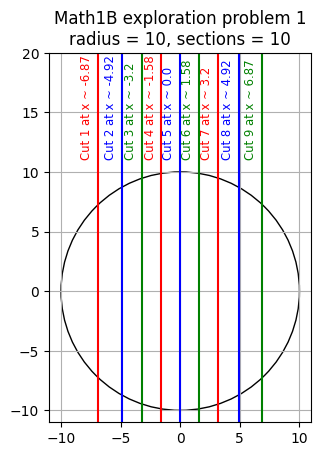

In [7]:
sections = 10
radius = 10

all_cuts = optimized_get_distances_abs(sections, radius)
for cut in all_cuts:
    print(f"cut at x = {cut}")

visualizer(all_cuts, radius)